<h1 ><center><b>Iris Flower Classification</b></center></h1>
<h3 ><center><b><i>Classifying Iris flower using Decison Tree Algorithm</i></b></center></h3>

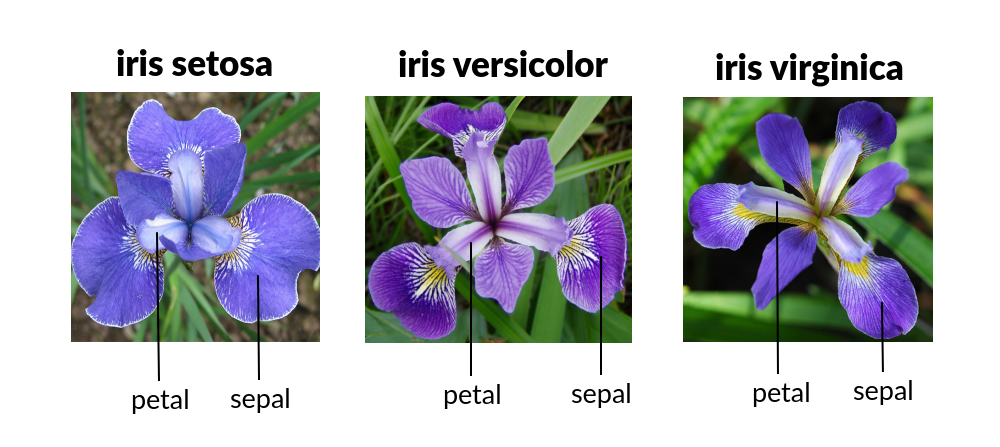

## Importing libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for displaying all the columns
pd.set_option('display.max_columns',None)

# for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for model training and predicting
from sklearn.tree import DecisionTreeClassifier

# for evaluating performance of models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

# for hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Loading the data

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Shape of the dataset

In [3]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 150 rows and 6 columns in the dataset


## Columns of the dataset

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Basic Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Unique values in each column

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

## Statistical summary

In [7]:
# Statistical summary of the numeric columns

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Statistical summary of the object columns

df.describe(include="object")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## Exploratory Data Analysis

### Checking for duplicate observations

In [9]:
df.duplicated().sum()

0

In [10]:
# There are no duplicate observations in the dataset.

### Checking for missing values

In [11]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# There are no missing values in the dataset.

### Checking for outliers 

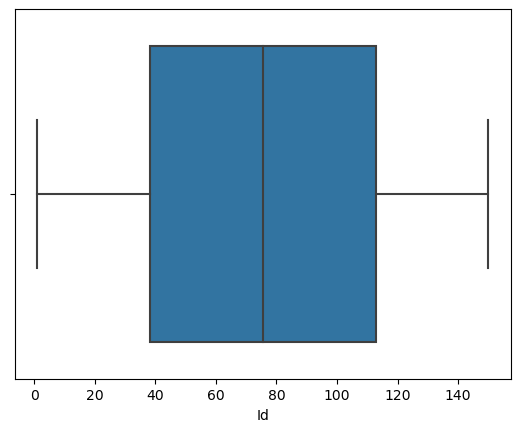

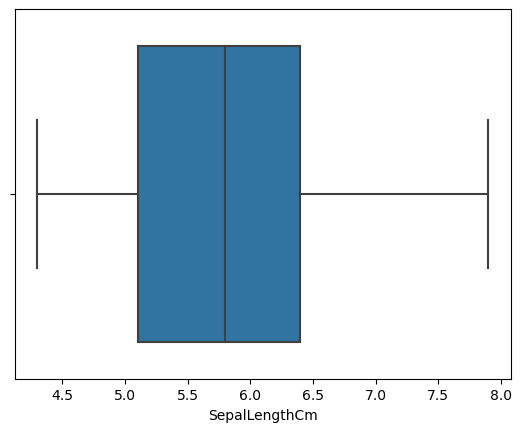

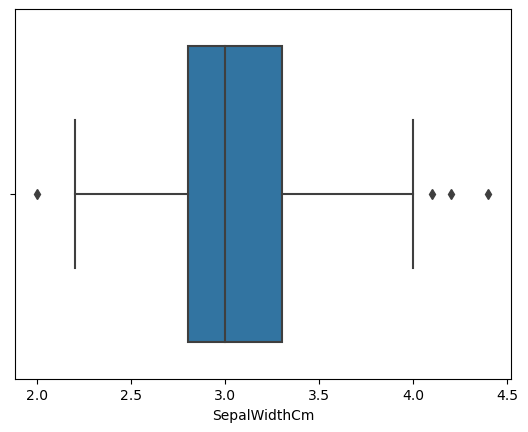

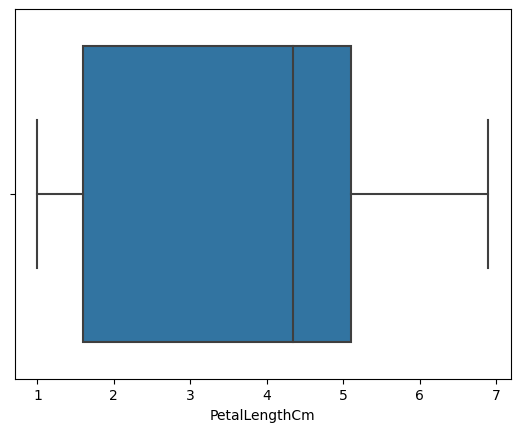

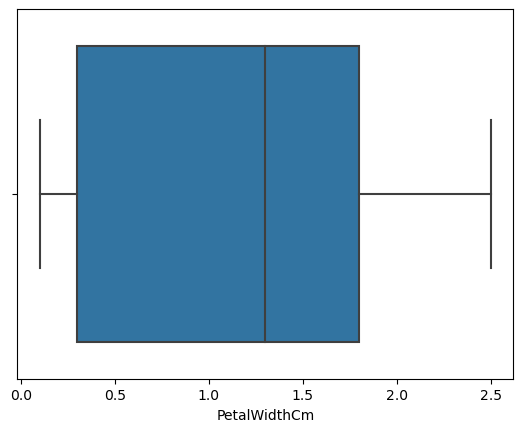

In [13]:
## visualizing through boxplot
for i in df.columns[:-1]:
    sns.boxplot(data=df, x=df[i])
    plt.show()

In [14]:
## Outliers are present in "sepal width" column only. We don't need to handle outliers because:
#    - There are very few outliers and range of the column is also very narrow.
#    - Decision tree classifier is capable of handling data with outliers.

## Univariate Analysis

## Analysis of Species 

### Proportion of each kind of Species

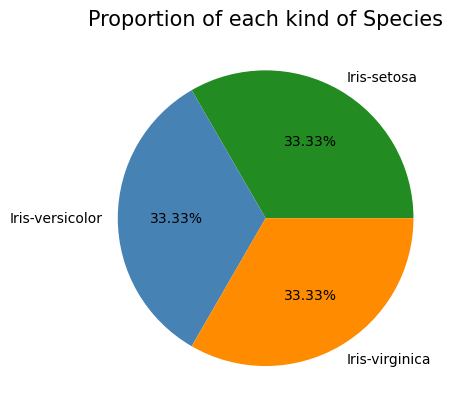

In [15]:
data = [df.Species.value_counts()[0], df.Species.value_counts()[1], df.Species.value_counts()[2]]
keys = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
# explode = [0, 0.1]
palette_color = [ "forestgreen", "steelblue", "darkorange"]
plt.pie(data, labels=keys, colors=palette_color,
        autopct='%.2f%%')
plt.title("Proportion of each kind of Species", size = 15)
plt.show()

In [16]:
# Each kind (Iris-setosa, Iris-versicolor and Iris-virginica) has equal percentage of observations, which is 33.33%.

## Distribution of features

### Extracting continuous features

In [17]:
continuous_features = []
for i in df.select_dtypes("float64").columns:
    continuous_features.append(i)

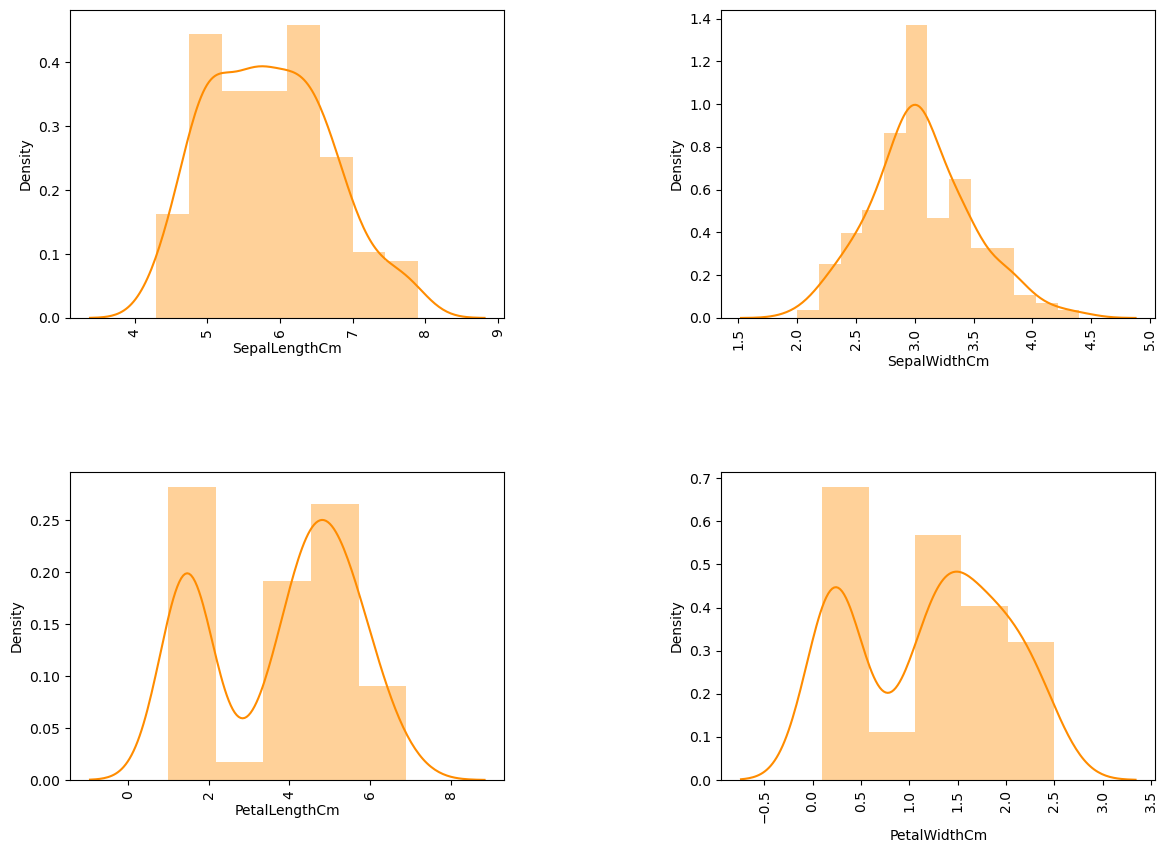

In [18]:
plt.figure(figsize = (14,10))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(continuous_features)):
    plt.subplot(2,2,i+1)
    plt.xticks(rotation=90)
    sns.distplot(df[continuous_features[i]], color="darkorange")
    
plt.show()

## Bivariate Analysis

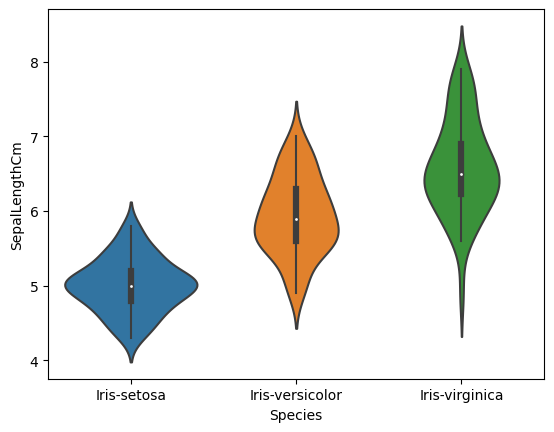

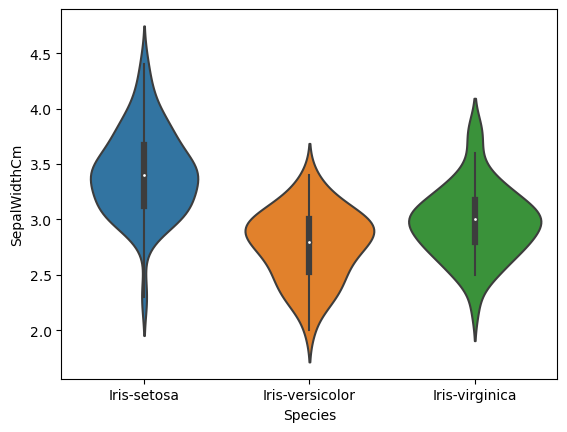

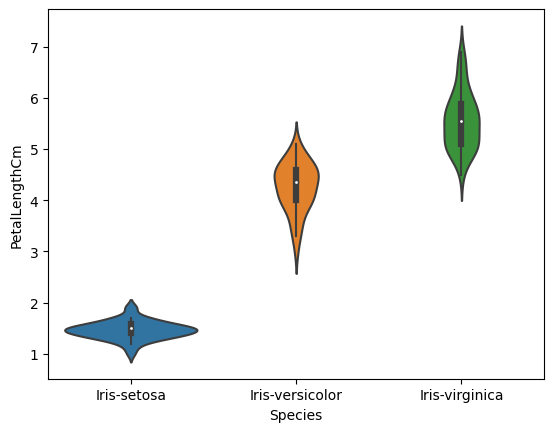

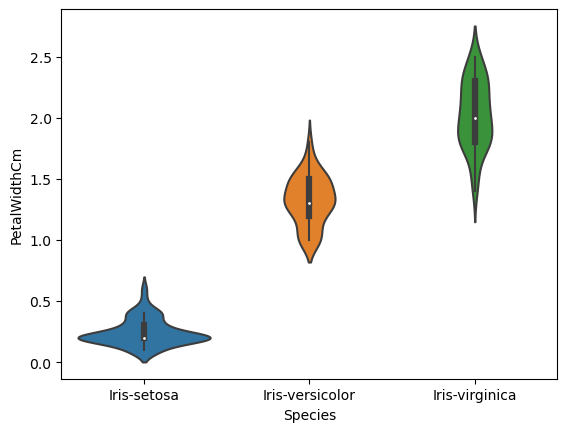

In [19]:
for i in continuous_features:
    sns.violinplot(data=df, y = i, x = "Species")
    plt.show()

## Multivariate Analysis

### Correlation among features

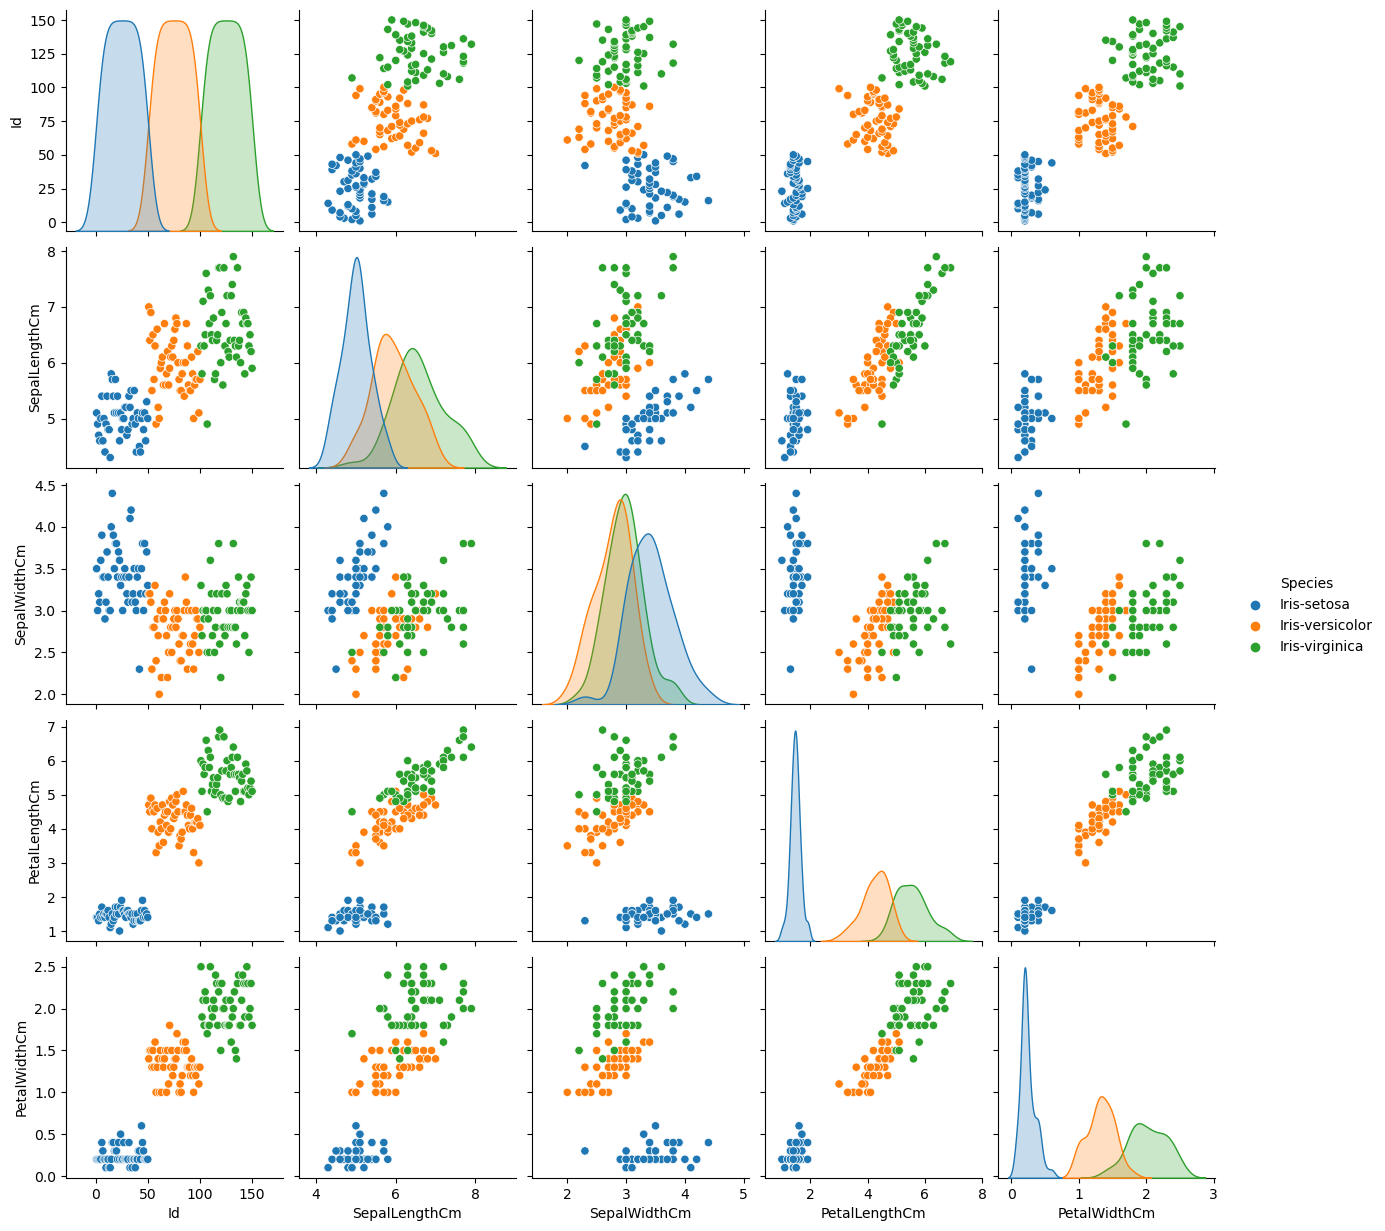

In [20]:
sns.pairplot(df, hue = "Species")
plt.show()

## Data Preprocessing

### Dropping redundant feature - Id

In [21]:
# not required for model building
df.drop("Id", axis=1, inplace=True)

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Creating a copy of dataset

In [23]:
# creating a copy of dataset before using the dataset for model building.
df1 = df.copy()

In [24]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the dataset into independent(X) and dependent(Y) variables

In [25]:
x = df1.drop("Species", axis = 1)
y = df1.Species

In [26]:
print(x.shape) ## contains independent features
print(y.shape) ## contains single target column

(150, 4)
(150,)


### Splitting the dataset into training and test dataset

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 33)

In [28]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Model Building

## Decision Tree

In [29]:
# training the model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### Applying cross validation 

In [30]:
# Function to find out mean of cross-validation score
acc_scores = cross_val_score(dt, x_train, y_train, cv=5, scoring = 'accuracy').mean()
print('Accuracy Score: ',acc_scores)   

Accuracy Score:  0.95


### Model Prediction

In [31]:
# predicting the observations
y_pred = dt.predict(x_test)            ## predicting test observations
y_pred_train=dt.predict(x_train)       ## predicting train observations

In [32]:
accuracy_score(y_test, y_pred)

0.8666666666666667

### Confusion matrix

In [33]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[22,  0],
        [ 0,  8]],

       [[18,  4],
        [ 0,  8]],

       [[16,  0],
        [ 4, 10]]], dtype=int64)

### Visualizing decision tree

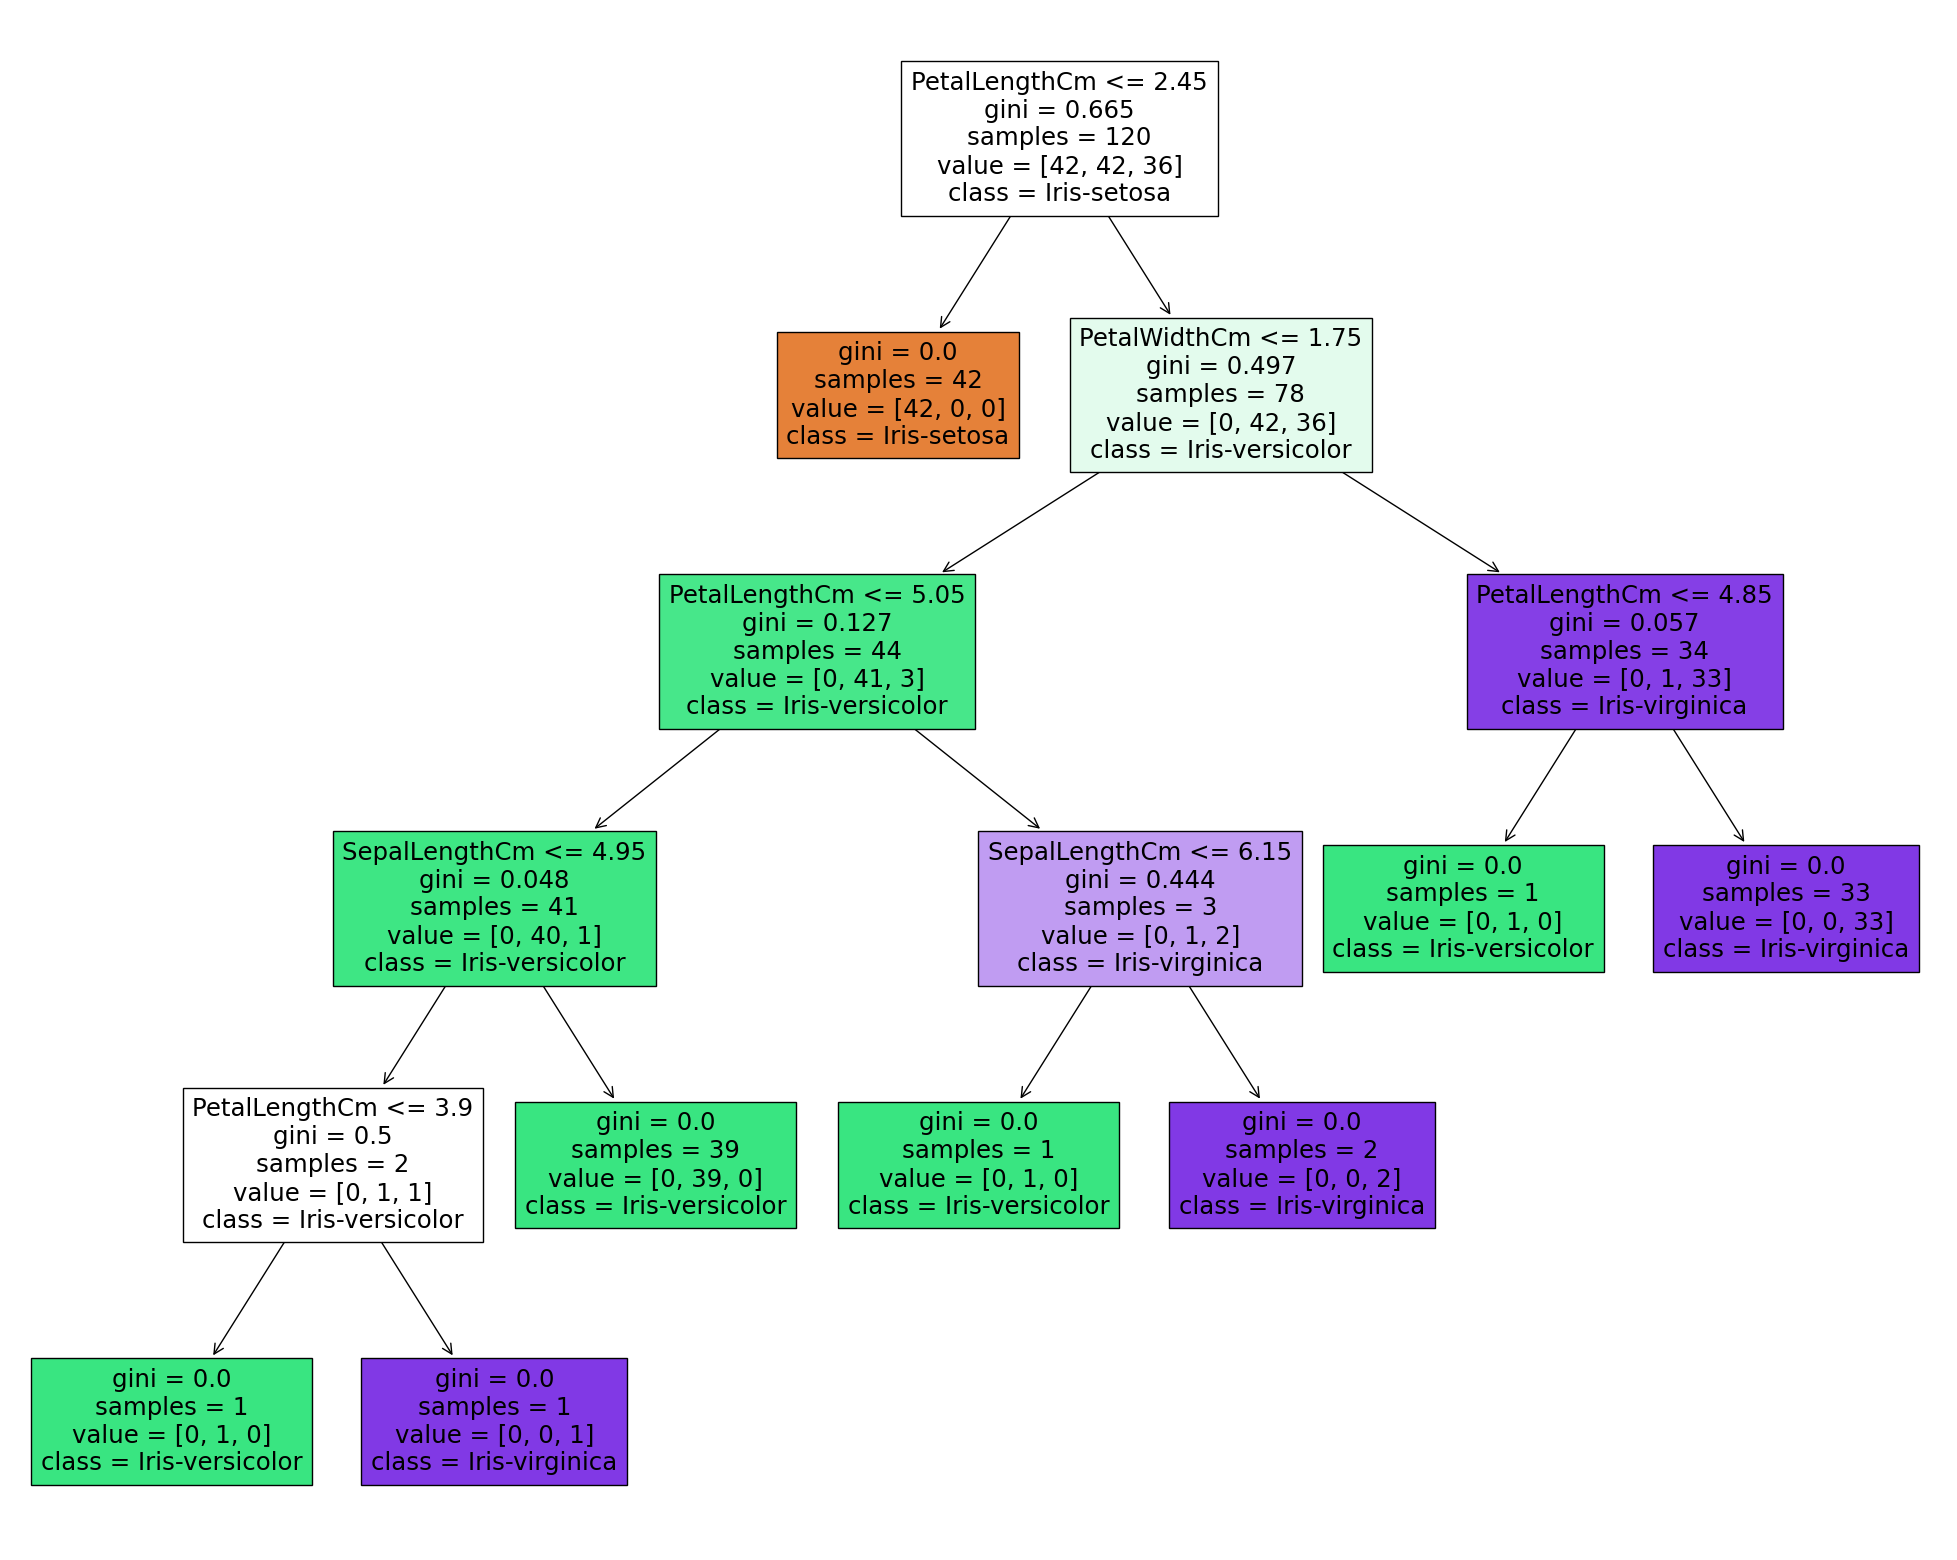

In [34]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

tree.plot_tree(dt,
               feature_names = features, 
               class_names=classes,
               filled = True);

### Classification report

In [35]:
# Printing classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.67      1.00      0.80         8
 Iris-virginica       1.00      0.71      0.83        14

       accuracy                           0.87        30
      macro avg       0.89      0.90      0.88        30
   weighted avg       0.91      0.87      0.87        30

For train data
------------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        42
 Iris-virginica       1.00      1.00      1.00        36

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



## Hyper parameter Tuning

- A technique to tweak the parameters of the model for optimal results.

#### Hyper parameters in Decision Tree

In [36]:
# DecisionTreeClassifier(
#     *,
#     criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     class_weight=None,
#     ccp_alpha=0.0,
# ) 

#### Random Search CV
- Using random search cv first to narrow down the search of optimal parameters

In [37]:
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,10,num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,5]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4]
# # Method of selecting samples for training each tree
max_leaf_nodes = [2,4,6,8,10]
# # Create the random grid
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}
print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 3, 4], 'max_leaf_nodes': [2, 4, 6, 8, 10]}


In [38]:
# Use the random grid to search for best hyperparameters
dtree = DecisionTreeClassifier()

# Random search of parameters, using 3 fold cross validation,search across 100 different combinations
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=33, n_jobs = -1)
# Fit the random search model
dtree_random.fit(x_train,y_train)

dtree_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 4,
 'max_features': 'log2',
 'max_depth': 3,
 'criterion': 'entropy'}

#### Grid Search CV 
- to find out optimal parameters for best performance

In [39]:
# Function to find out best parameters using Grid Search CV

def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring = "accuracy")
    grid_search.fit(x_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)    

In [40]:
# Using random search best parameters to create a range of values to tune using grid search cv

param_grid = {'criterion': ['gini', 'entropy'],
 'min_samples_split': [1,2,4],
 'min_samples_leaf': [1,2,4],
 'max_features': ['sqrt', 'auto', 'log2'],
 'max_depth': [2,4,6],
 'max_leaf_nodes': [8,10,12,14]
              
             }
dt = DecisionTreeClassifier()
classifier(dt, param_grid)

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.975


### Tuned Decision Tree Algorithm - 1

In [43]:
# training on hyper parameters
dt_tuned= DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 'sqrt', 
                                 max_leaf_nodes= 8, min_samples_leaf = 4, min_samples_split = 4, random_state = 33)
dt_tuned.fit(x_train,y_train)

# to find out mean of cross-validation score
acc_scores = cross_val_score(dt_tuned, x_train, y_train, cv=5, scoring = 'accuracy').mean()
print('Accuracy Score: ',acc_scores)   

Accuracy Score:  0.9583333333333334


### Prediction

In [44]:
# predicting the observations
y_pred_tuned = dt_tuned.predict(x_test)            ## predicting test observations
y_pred_train_tuned=dt_tuned.predict(x_train)       ## predicting train observations

### Accuracy Score

In [45]:
accuracy_score(y_pred_tuned, y_test)

0.8666666666666667

### Tuned Decision Tree Algorithm - 2

In [46]:
# training on hyper parameters
dt_tuned= DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 2, max_leaf_nodes= 6, 
                                 random_state = 33)
dt_tuned.fit(x_train,y_train)


# to find out mean of cross-validation score
acc_scores = cross_val_score(dt_tuned, x_train, y_train, cv=5, scoring = 'accuracy').mean()
print('Accuracy Score: ',acc_scores)   

Accuracy Score:  0.95


### Prediction

In [47]:
y_pred_tuned = dt_tuned.predict(x_test)            ## predicting test observations
y_pred_train_tuned=dt_tuned.predict(x_train)  

### Accuracy Score

In [48]:
print(accuracy_score(y_pred_tuned, y_test))

0.9666666666666667


### Confusion Matrix

In [49]:
multilabel_confusion_matrix(y_pred_tuned, y_test)

array([[[22,  0],
        [ 0,  8]],

       [[21,  0],
        [ 1,  8]],

       [[16,  1],
        [ 0, 13]]], dtype=int64)

### Classification Report

In [50]:
# Printing classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred_tuned))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train_tuned))

For test data
------------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

For train data
------------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.98      0.95      0.96        42
 Iris-virginica       0.95      0.97      0.96        36

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.98      0.97      0.98       120



### Visualizing Tuned Decision Tree

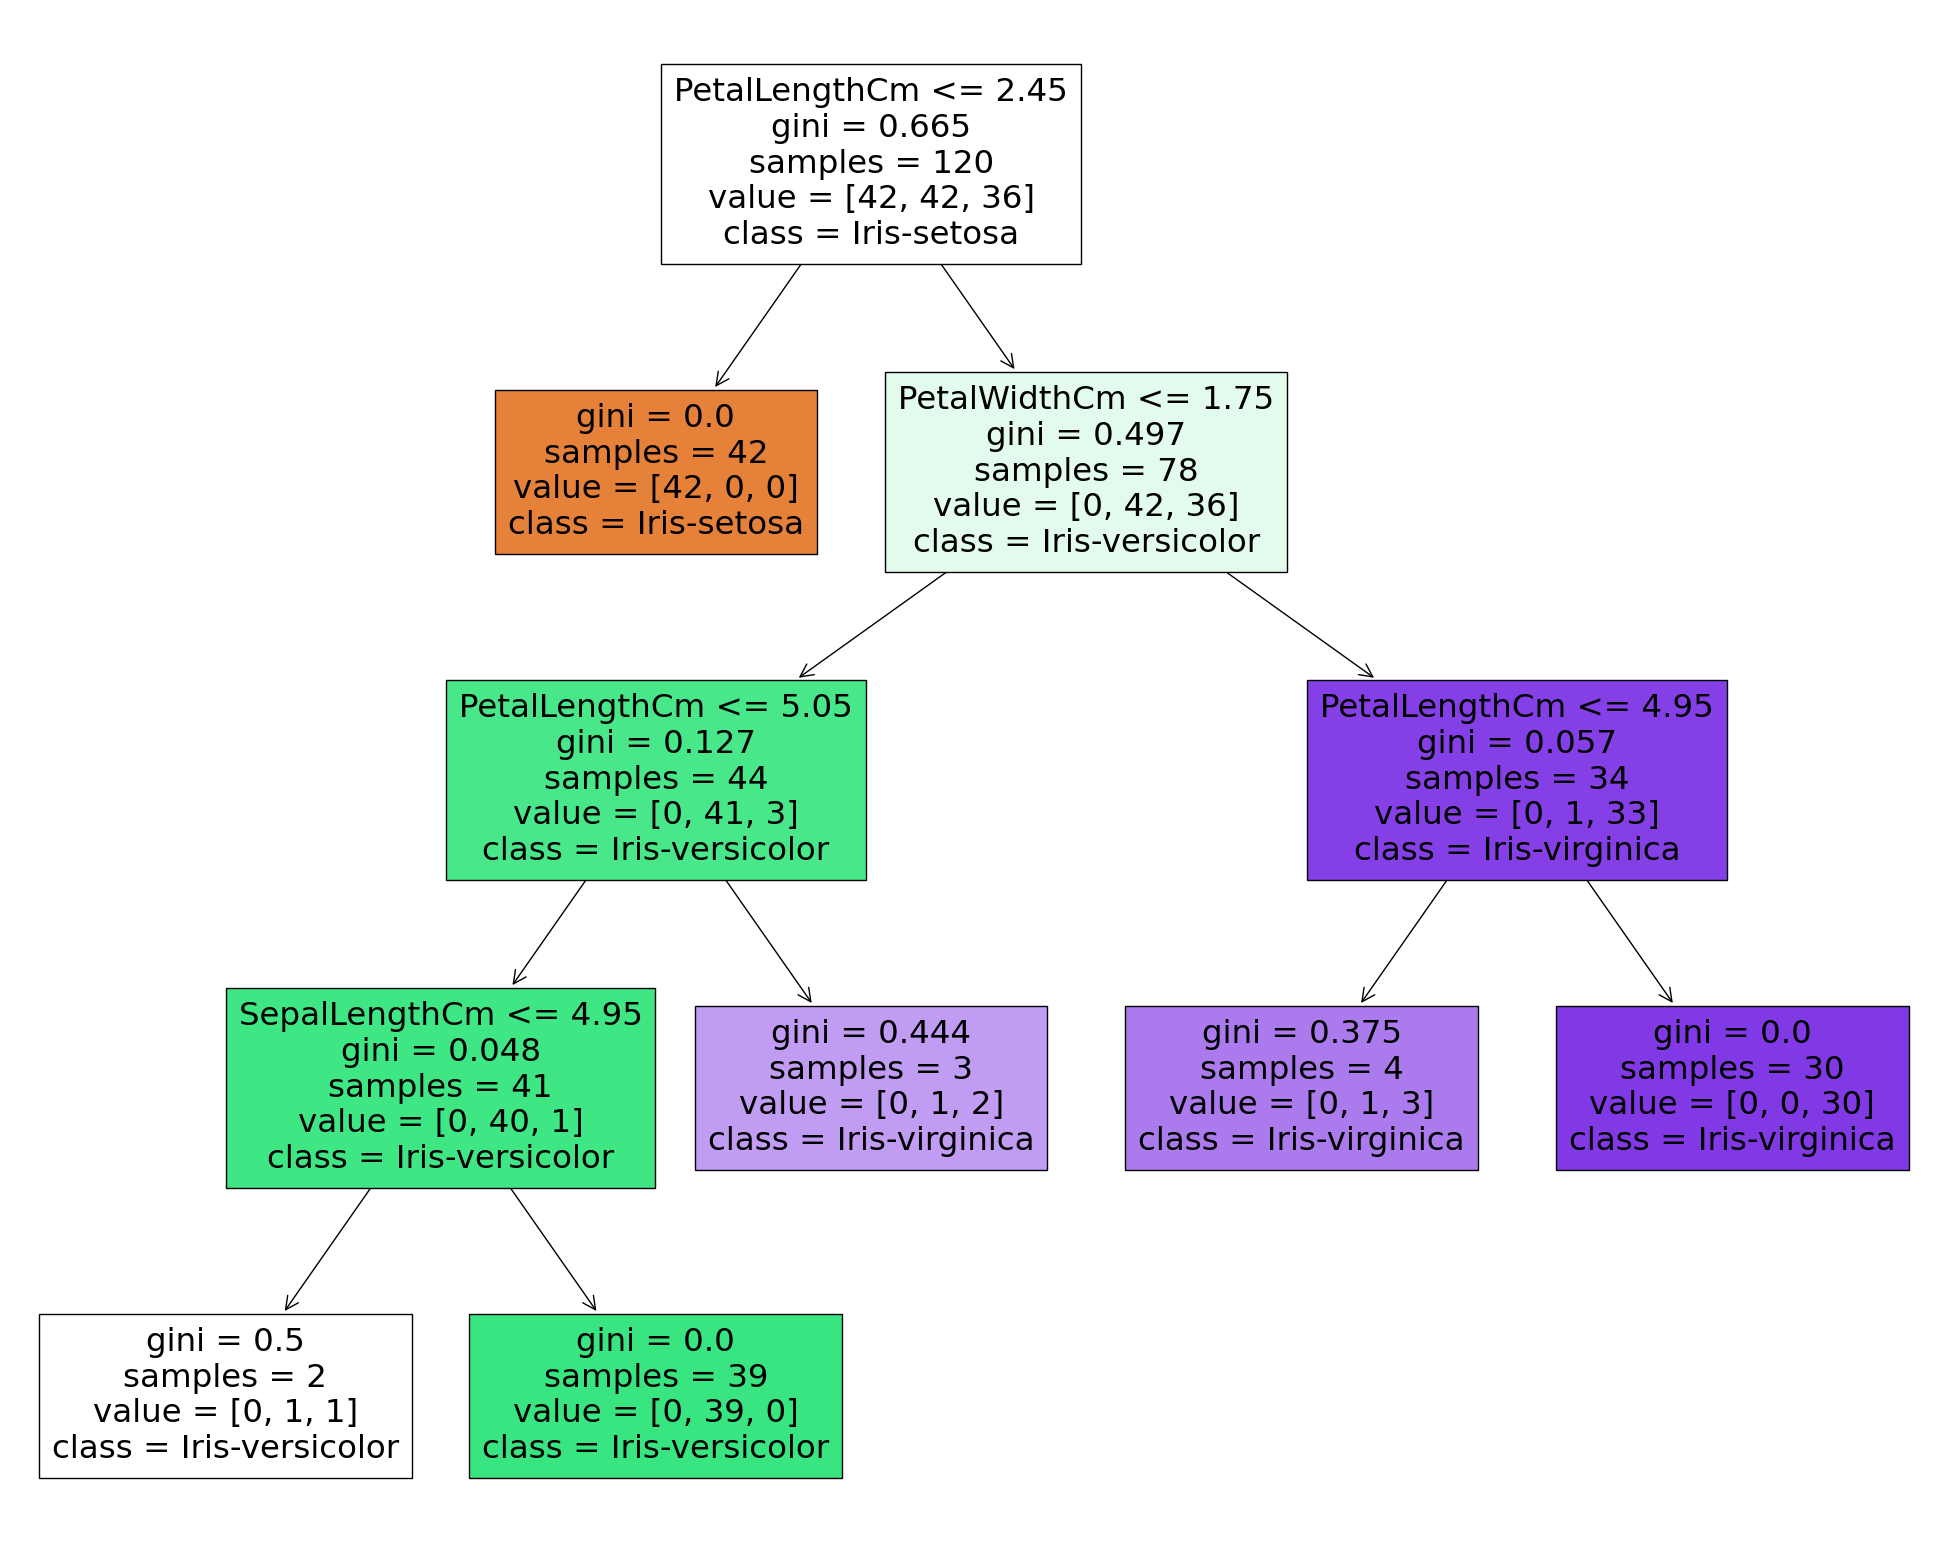

In [51]:
fig = plt.figure(figsize=(25,20))
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

tree.plot_tree(dt_tuned,
               feature_names = features, 
               class_names=classes,
               filled = True);

**Decision Tree algorithm can correctly classify Iris flower with 96.67% accuracy.**

### Testing algorithm for new values (apart from given dataset)

In [54]:
Test_values = [[6.4, 2.8, 4.7, 1.5],
              [6.0, 2.2, 5.0, 2.0],
              [5.5, 3.0, 4.6, 1.6],
              [5.1, 3.3, 1.8, 0.5]]

predictions = dt_tuned.predict(Test_values)
print(predictions)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa']
